# Importing required Libraries

In [118]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Loading Dataset

From our datasets, we consists of three different datasets files, that are, 

`train_values.csv` --> consists of datasets for training our model.

`train_labels.csv` --> consists of datasets with building id and label values only.

`test_values.csv` --> consists of datasets for testing purpose.

In [119]:
train_values_df = pd.read_csv("HouseDamagePrediction/datasets/train_values.csv")
train_values_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [120]:
train_labels_df = pd.read_csv("HouseDamagePrediction/datasets/train_labels.csv")
train_labels_df.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [121]:
test_values_df = pd.read_csv("HouseDamagePrediction/datasets/test_values.csv")
test_values_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Let's see the shape of our datasets.

print(f"The shape of train_values_df = {train_values_df.shape}")
print(f"The shape of train_values_df = {train_labels_df.shape}")
print(f"The shape of train_values_df = {test_values_df.shape}")

The shape of train_values_df = (260601, 39)
The shape of train_values_df = (260601, 2)
The shape of train_values_df = (86868, 39)


In our train_values_df and train_label_df, we have `building_id` common. So, we can merge these two dataframes for analysis purpose

In [123]:
df = train_values_df.merge(train_labels_df, how="inner")
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


# Exploratory Data Analysis

In [124]:
print(f"The shape of df = {df.shape}")

The shape of df = (260601, 40)


In [125]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

### Droping `building_id` column from our datasets, which do not affect our target attribute `damage_grade`

In [126]:
df.drop('building_id', axis=1, inplace=True)

In [127]:
len(df.columns)

39

In [128]:
#Checking for null datapoints or tuples in our datasets

In [129]:
df.isnull().values.any()

False

`False` means There are no any null values in our datasets.

Let's confirm this and check for null values in each attribute columns.

In [130]:
df.isna().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [132]:
df.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [133]:
categorical_attributes = list(df.select_dtypes(include=["O"]).columns)
numerical_attributes = list(df.select_dtypes(include=np.number).columns)

In [134]:
categorical_attributes

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [135]:
len(categorical_attributes)

8

In [136]:
df.describe(include=["O"])

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [137]:
numerical_attributes

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'damage_grade']

In [138]:
len(numerical_attributes)

31

In [139]:
df.describe(exclude=["O"])

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Identifying `Binary-valued attributes` from numerical_features

In [140]:
v = df['has_secondary_use'].unique()
v.size

2

In [141]:
print(v)

[0 1]


In [142]:
val = np.array([0, 1])
binary_attr = []

for attr in numerical_attributes:
    attr_val = df[attr].unique()
    if attr_val.size == val.size and ((attr_val == val).all()):
        binary_attr.append(attr)

In [143]:
binary_attr

['has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [144]:
len(binary_attr)

20

### `Data Distribution`

Lets check dtype of our target attribute `damage_grade`

In [145]:
df.damage_grade.dtype

dtype('int64')

In [146]:
df.damage_grade.unique()

array([3, 2, 1], dtype=int64)

Even though dtype of `damage_grade` is of `integer type`. 

It is a `categorical attribute`
 
Let's change this into `Categorical type`

In [147]:
df.damage_grade = df.damage_grade.astype('category')

Deleting `damage_grade` from `numerical_attributes`

In [148]:
len(numerical_attributes)

31

In [149]:
numerical_attributes.remove('damage_grade')

In [150]:
len(numerical_attributes)

30

In [151]:
df.damage_grade.dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [152]:
df.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [153]:
class_count_df = pd.DataFrame(df['damage_grade'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({1: 'Low',
                                 2: 'Medium',
                                 3: 'High'}, inplace=True)
class_count_df.head()

,Class,Counts
0,Medium,148259
1,High,87218
2,Low,25124


C:\Users\Abhishek Thapa\AppData\Local\Temp\ipykernel_7552\785529710.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


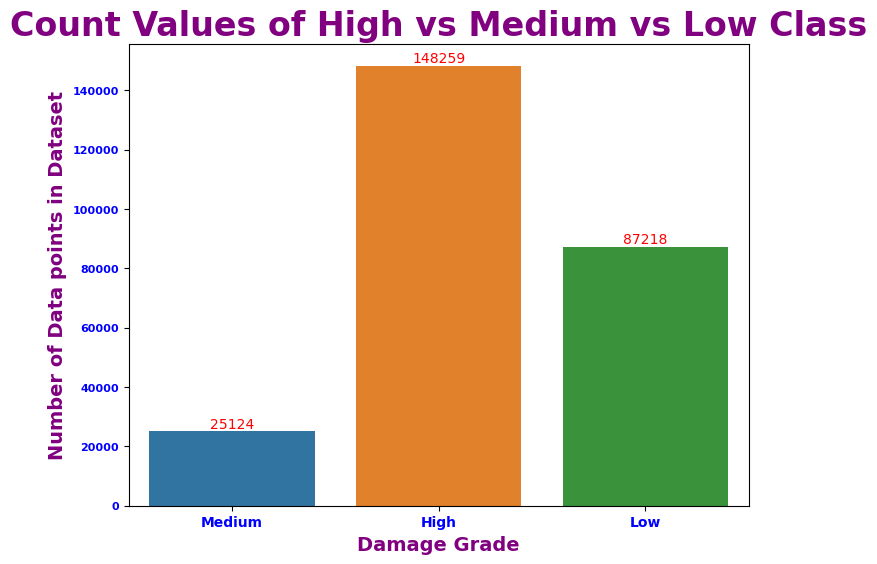

In [155]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

ax = sns.countplot(x=df.damage_grade);

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Damage Grade', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Number of Data points in Dataset', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of High vs Medium vs Low Class', fontsize=24, fontweight='bold').set_color('purple')

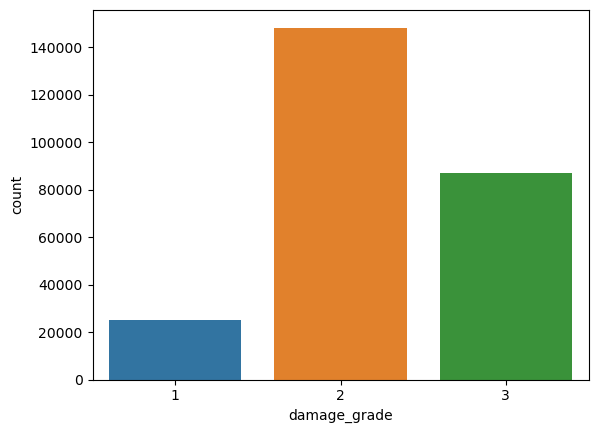

In [156]:
sns.countplot(x=df.damage_grade);

## `Visulaization`

In [159]:
df.area_percentage.min()

1

In [160]:
df.area_percentage.max()

100

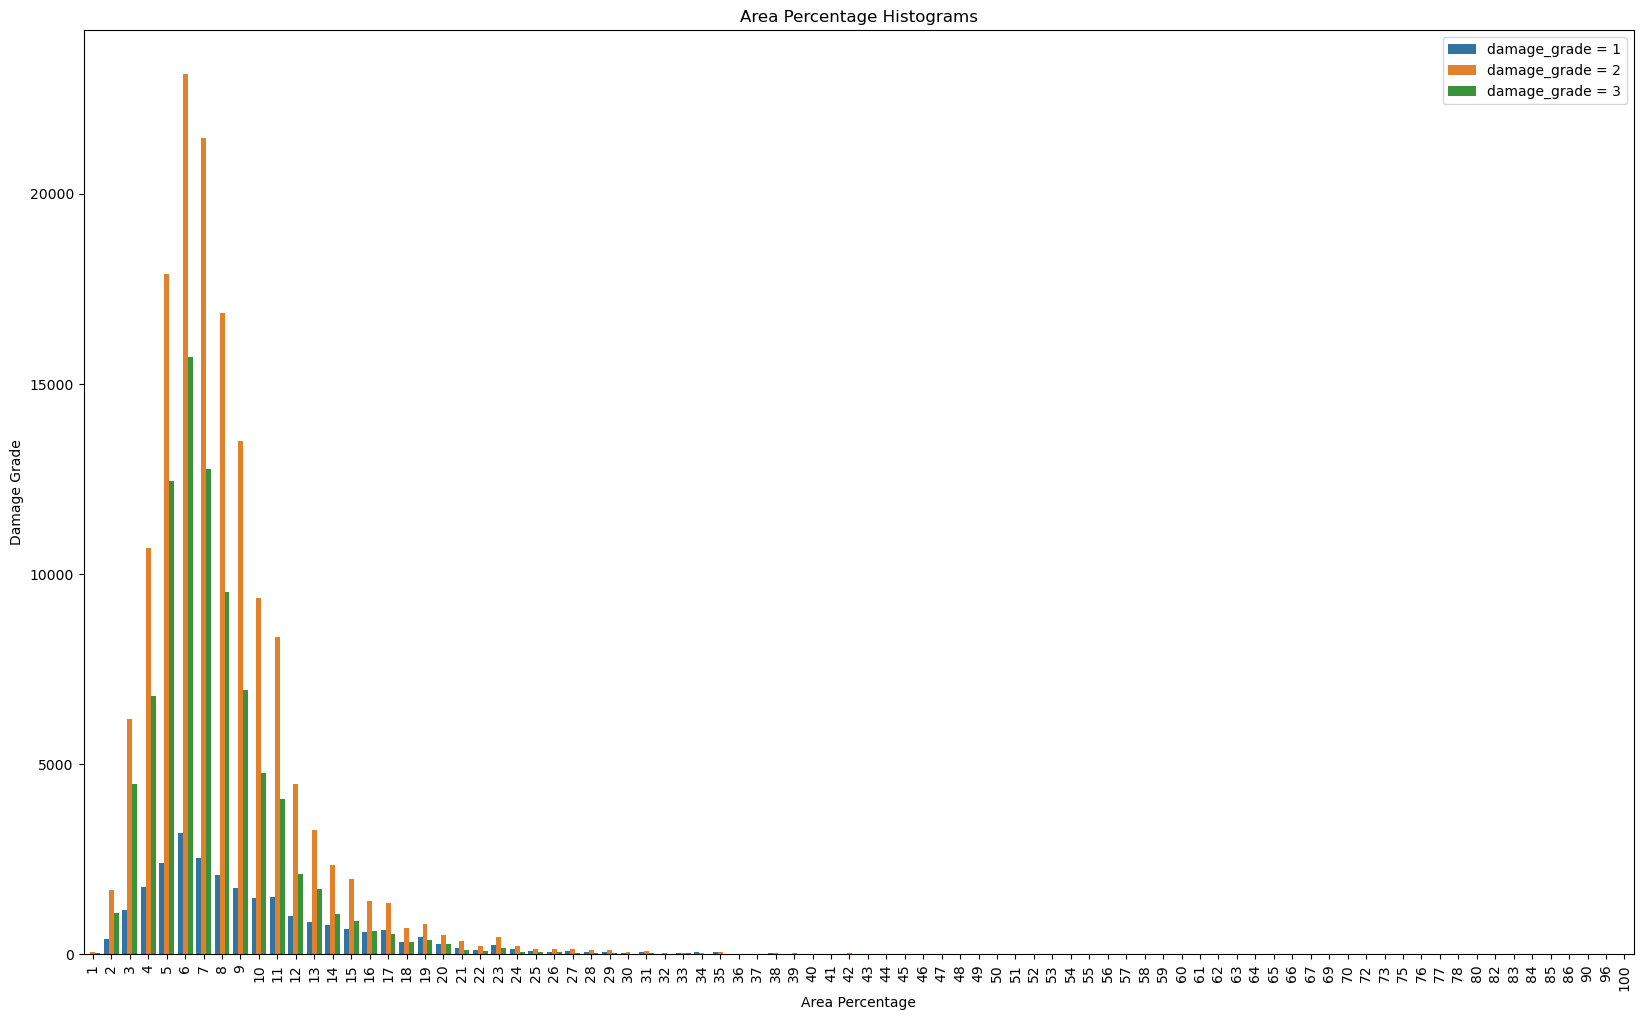

In [163]:
plt.figure(figsize=(20,12))
sns.countplot(x=df["area_percentage"],hue=df["damage_grade"])
plt.ylabel("Damage Grade")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

From this graph, we can see that the normalized area of the building footprint is less than arround 20% for most of buildings. Also, some of the values reach to 100, which are not clearly visible in this chart as they are very few in numbers. Thus, we need to take care of the outliers for this feature.

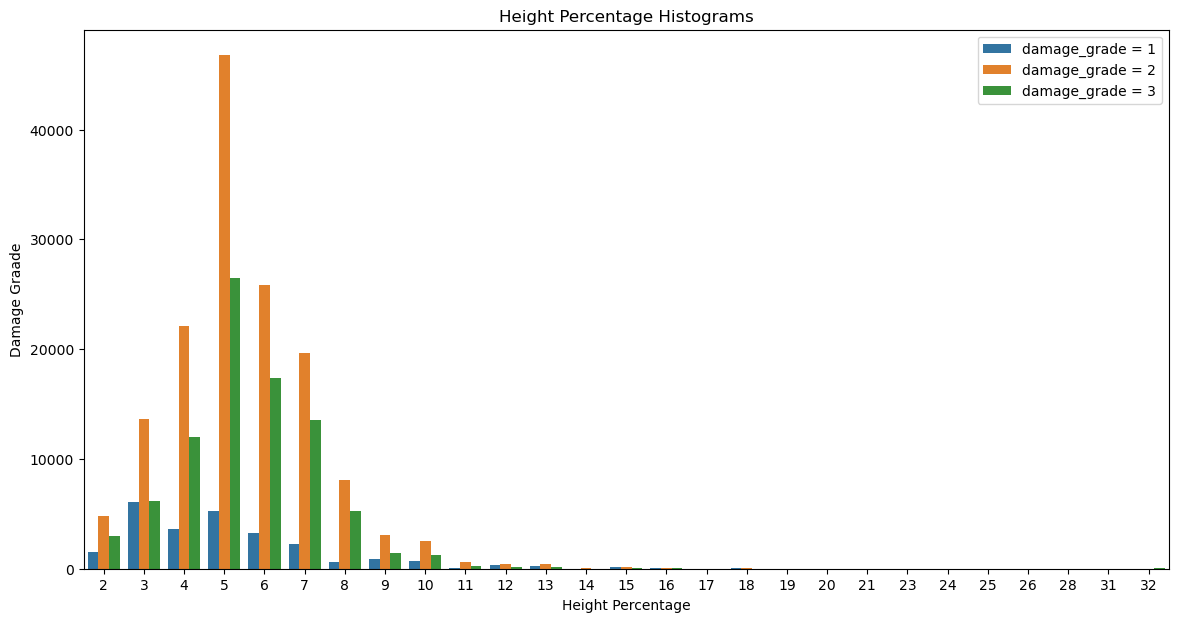

In [165]:
plt.figure(figsize=(14,7))
sns.countplot(x=df["height_percentage"],hue=df["damage_grade"])
plt.ylabel("Damage Graade")
plt.xlabel("Height Percentage")
# plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Again, we have another attribute that needs to have its outliers removed. Most of the data for this feature is less than 10%, but we have some buildings with values up to 32%.

In [178]:
def countplot_vis(attr, title):
    sns.countplot(x = attr, hue = df["damage_grade"])
    plt.title(f"{title} Distribution")
    plt.show()
    print(f"Unique Values are: {attr.unique()}")

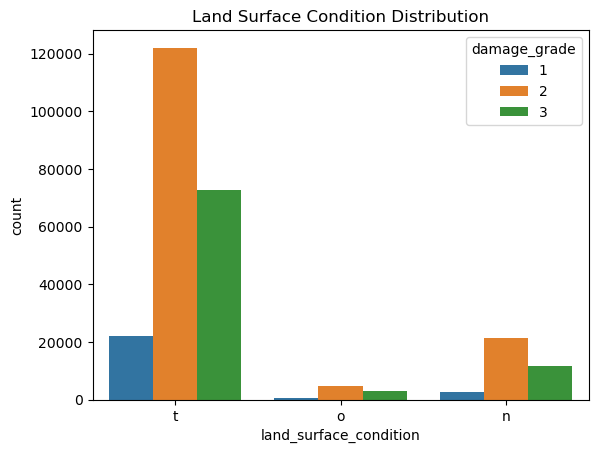

Unique Values are: ['t' 'o' 'n']


In [179]:
countplot_vis(df.land_surface_condition, "Land Surface Condition")

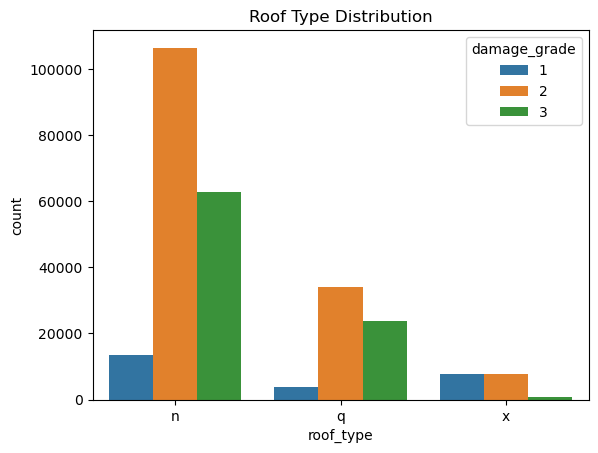

Unique Values are: ['n' 'q' 'x']


In [180]:
countplot_vis(df.roof_type, "Roof Type")

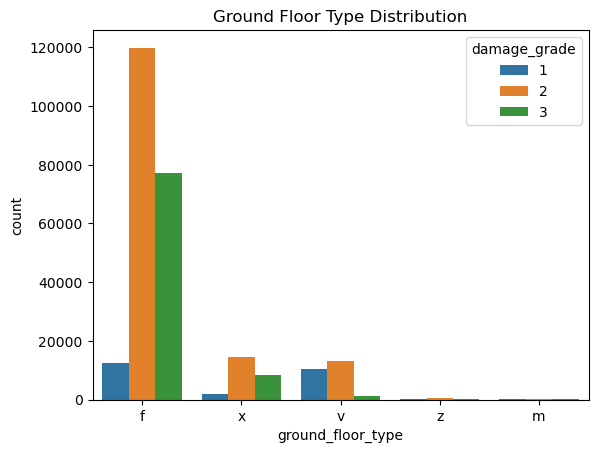

Unique Values are: ['f' 'x' 'v' 'z' 'm']


In [181]:
countplot_vis(df.ground_floor_type, "Ground Floor Type")

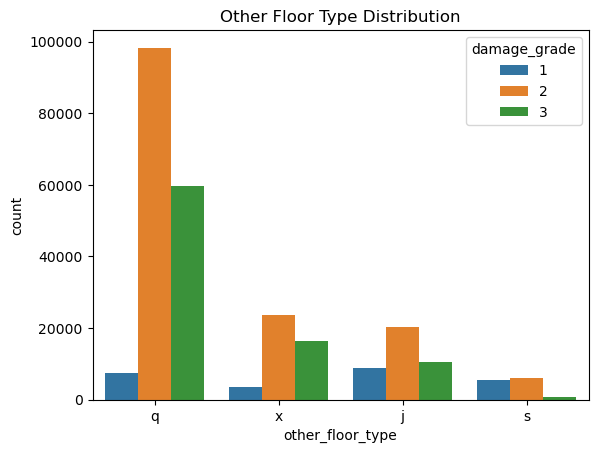

Unique Values are: ['q' 'x' 'j' 's']


In [182]:
countplot_vis(df.other_floor_type, "Other Floor Type")

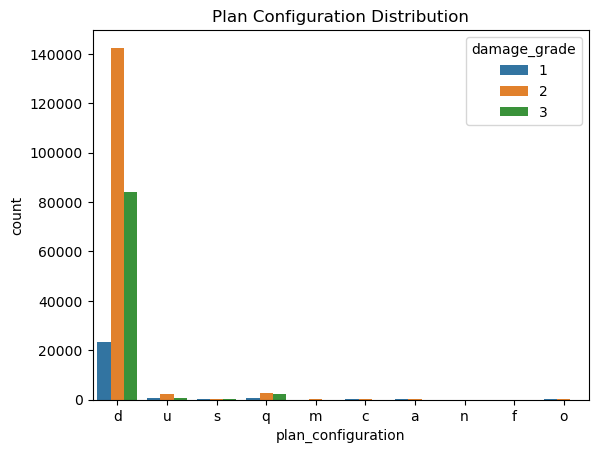

Unique Values are: ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']


In [183]:
countplot_vis(df.plan_configuration, "Plan Configuration")

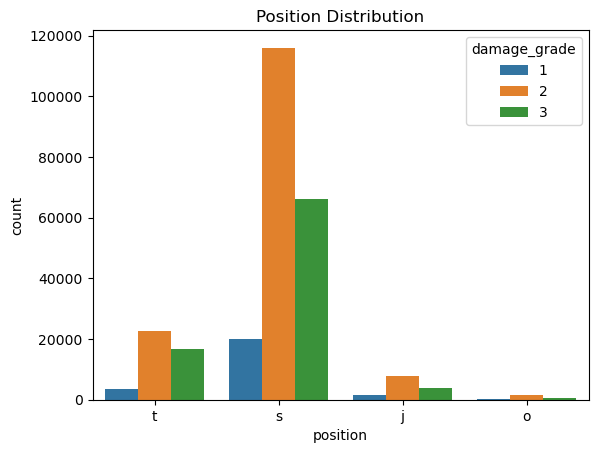

Unique Values are: ['t' 's' 'j' 'o']


In [184]:
countplot_vis(df.position, "Position")

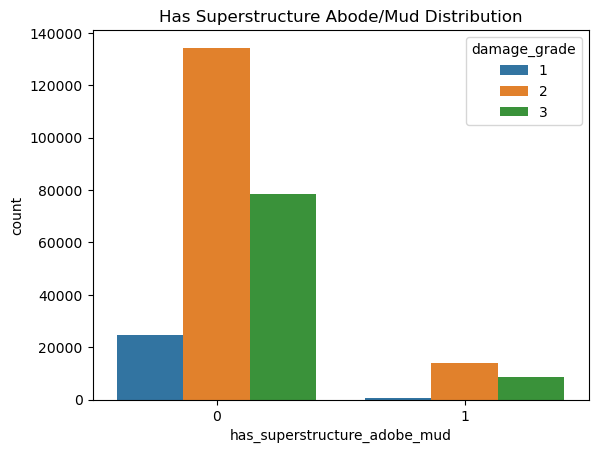

Unique Values are: [1 0]


In [185]:
countplot_vis(df.has_superstructure_adobe_mud, "Has Superstructure Abode/Mud")

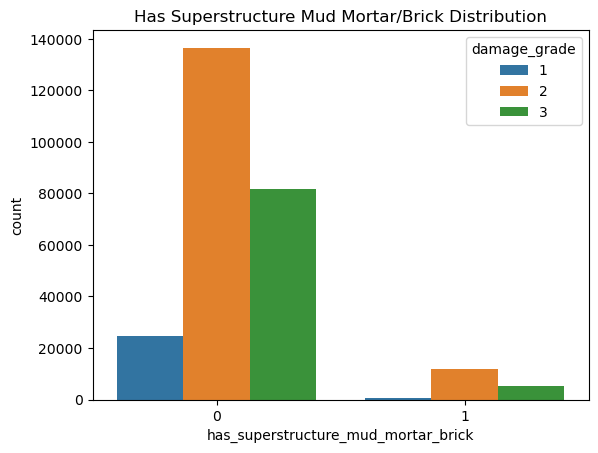

Unique Values are: [0 1]


In [187]:
countplot_vis(df.has_superstructure_mud_mortar_brick, "Has Superstructure Mud Mortar/Brick")

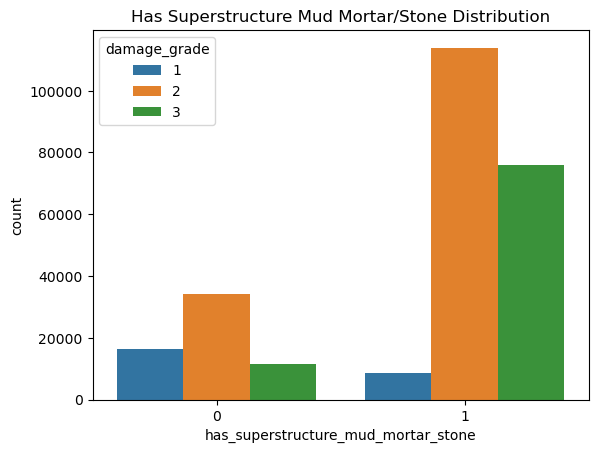

Unique Values are: [1 0]


In [188]:
countplot_vis(df.has_superstructure_mud_mortar_stone, "Has Superstructure Mud Mortar/Stone")

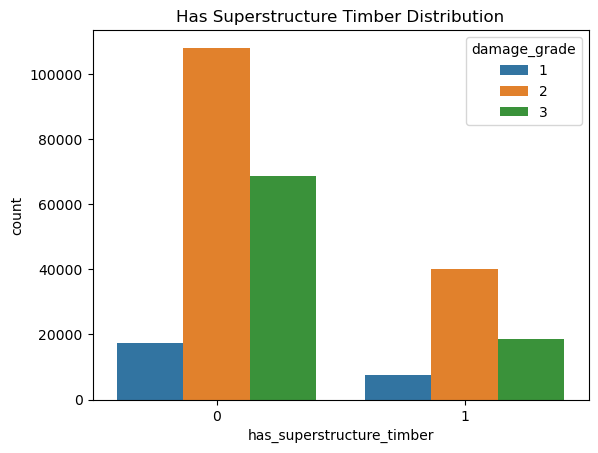

Unique Values are: [0 1]


In [189]:
countplot_vis(df.has_superstructure_timber, "Has Superstructure Timber")

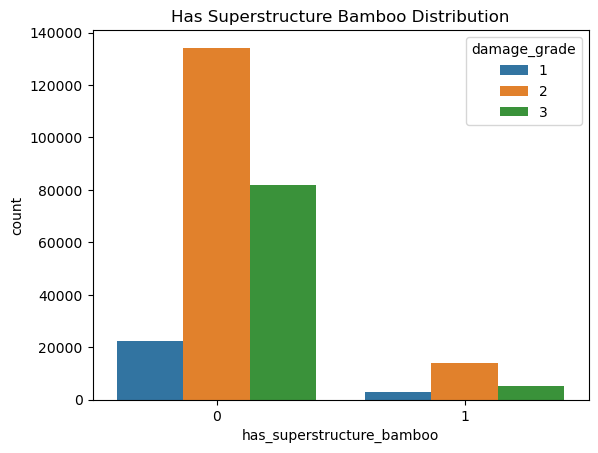

Unique Values are: [0 1]


In [190]:
countplot_vis(df.has_superstructure_bamboo, "Has Superstructure Bamboo")

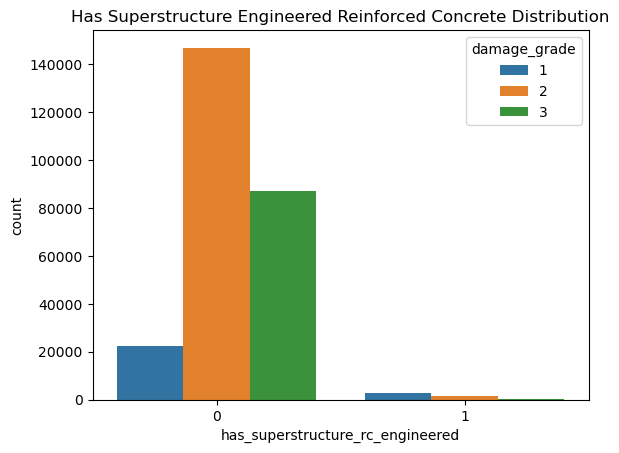

Unique Values are: [0 1]


In [191]:
countplot_vis(df.has_superstructure_rc_engineered, "Has Superstructure Engineered Reinforced Concrete")

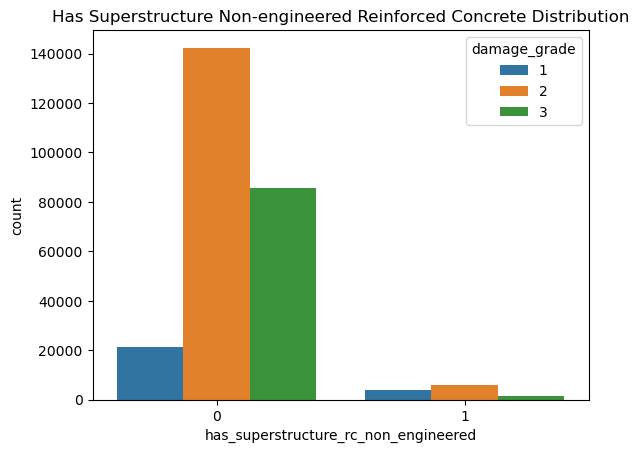

Unique Values are: [0 1]


In [193]:
countplot_vis(df.has_superstructure_rc_non_engineered, "Has Superstructure Non-engineered Reinforced Concrete")

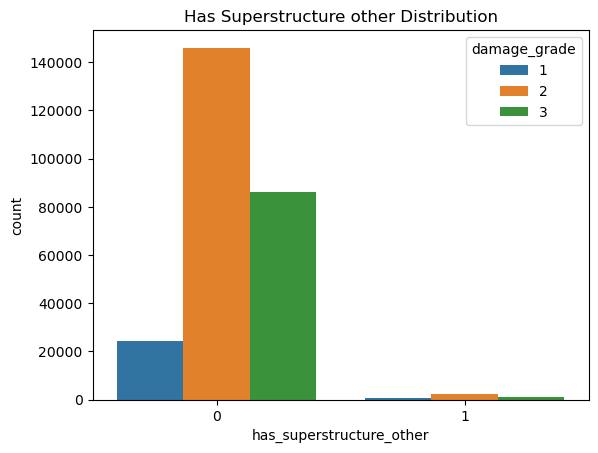

Unique Values are: [0 1]


In [194]:
countplot_vis(df.has_superstructure_other, "Has Superstructure other")

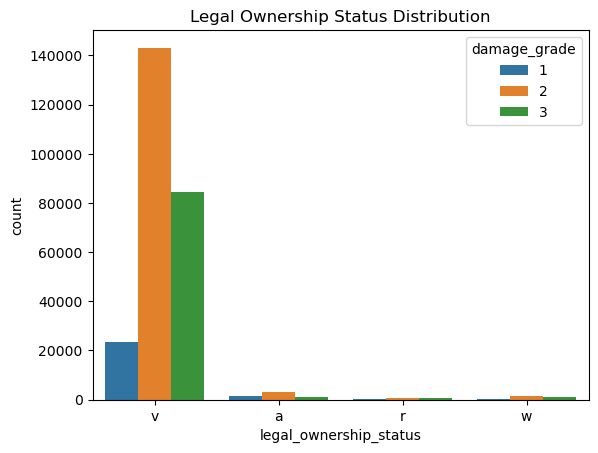

Unique Values are: ['v' 'a' 'r' 'w']


In [195]:
countplot_vis(df.legal_ownership_status, "Legal Ownership Status")

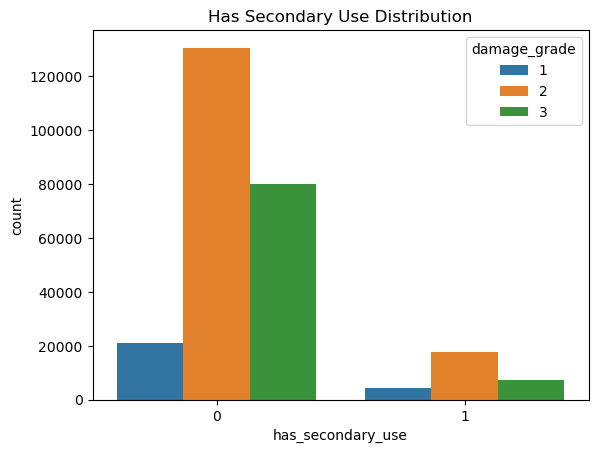

Unique Values are: [0 1]


In [196]:
countplot_vis(df.has_secondary_use, "Has Secondary Use")

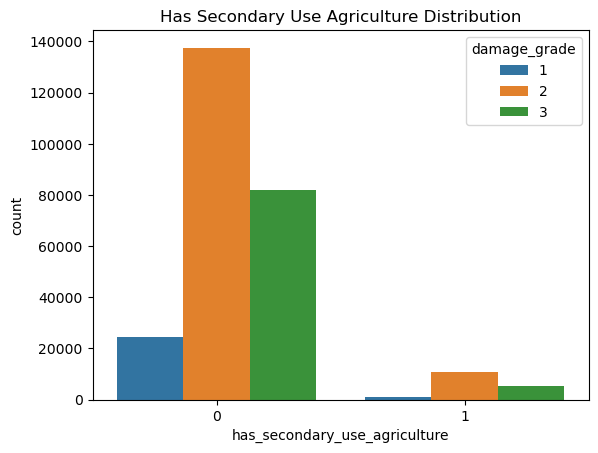

Unique Values are: [0 1]


In [197]:
countplot_vis(df.has_secondary_use_agriculture, "Has Secondary Use Agriculture")

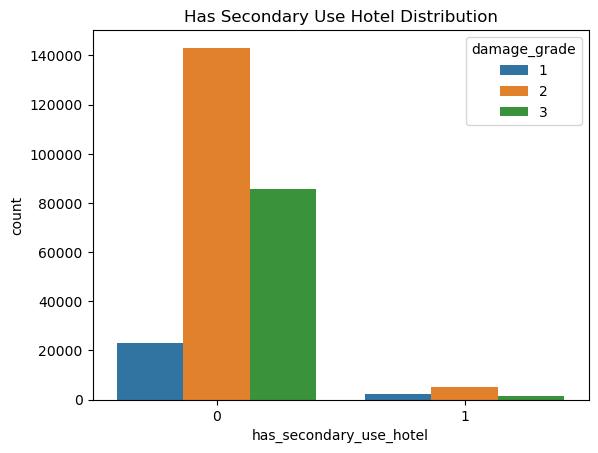

Unique Values are: [0 1]


In [198]:
countplot_vis(df.has_secondary_use_hotel, "Has Secondary Use Hotel")

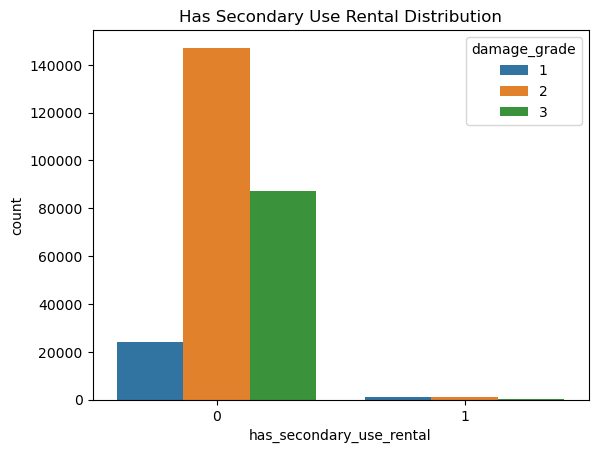

Unique Values are: [0 1]


In [199]:
countplot_vis(df.has_secondary_use_rental, "Has Secondary Use Rental")

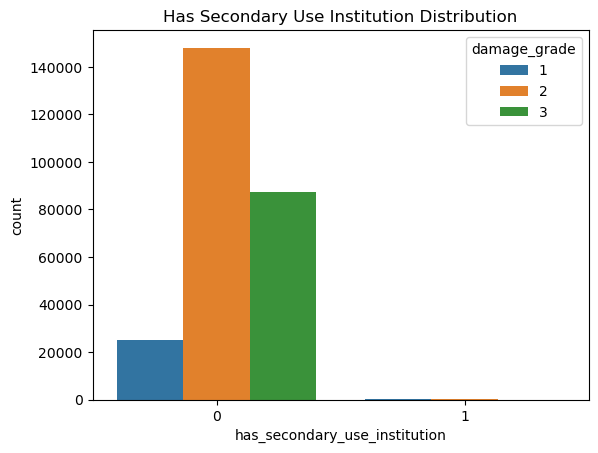

Unique Values are: [0 1]


In [200]:
countplot_vis(df.has_secondary_use_institution, "Has Secondary Use Institution")

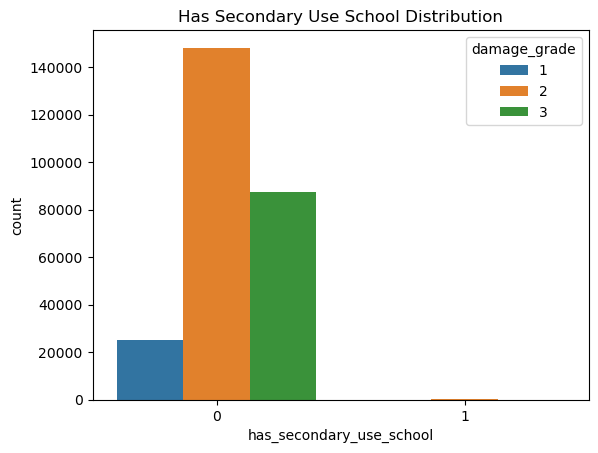

Unique Values are: [0 1]


In [201]:
countplot_vis(df.has_secondary_use_school, "Has Secondary Use School")

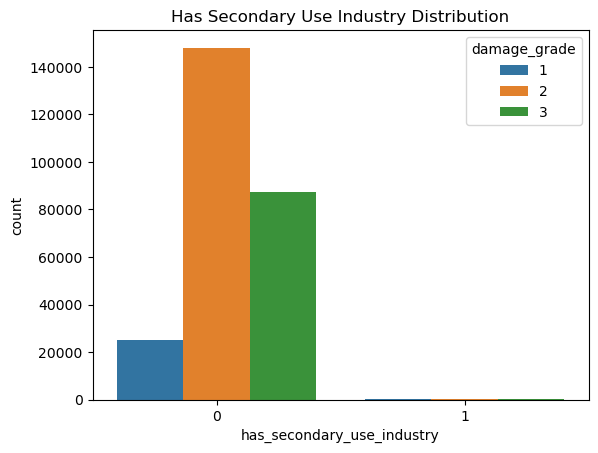

Unique Values are: [0 1]


In [202]:
countplot_vis(df.has_secondary_use_industry, "Has Secondary Use Industry")

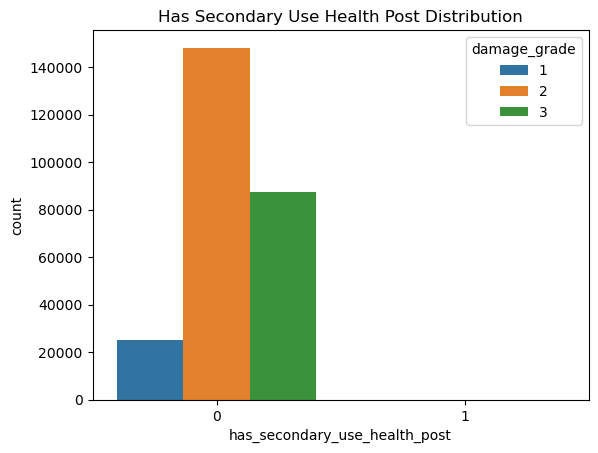

Unique Values are: [0 1]


In [203]:
countplot_vis(df.has_secondary_use_health_post, "Has Secondary Use Health Post")

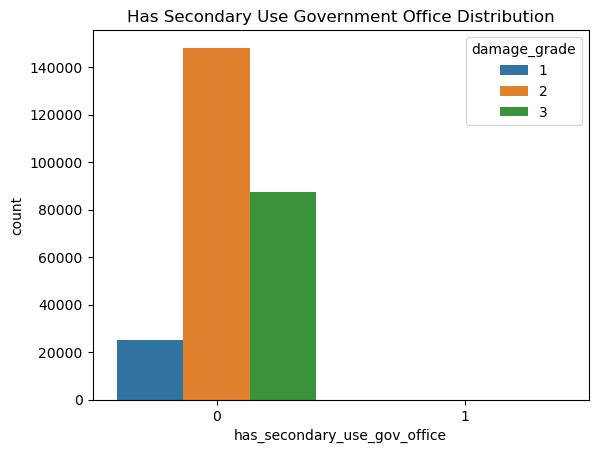

Unique Values are: [0 1]


In [204]:
countplot_vis(df.has_secondary_use_gov_office, "Has Secondary Use Government Office")

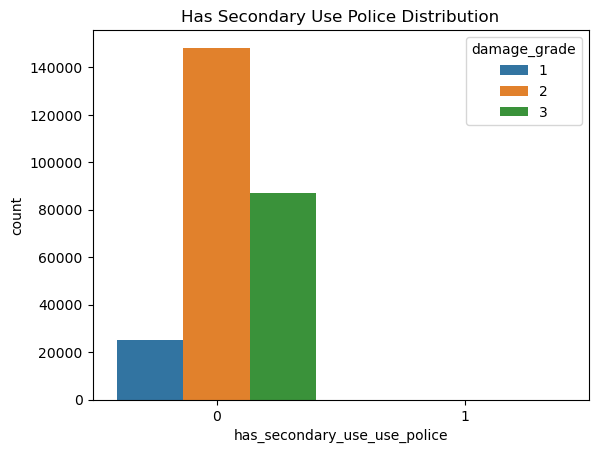

Unique Values are: [0 1]


In [206]:
countplot_vis(df.has_secondary_use_use_police, "Has Secondary Use Police")

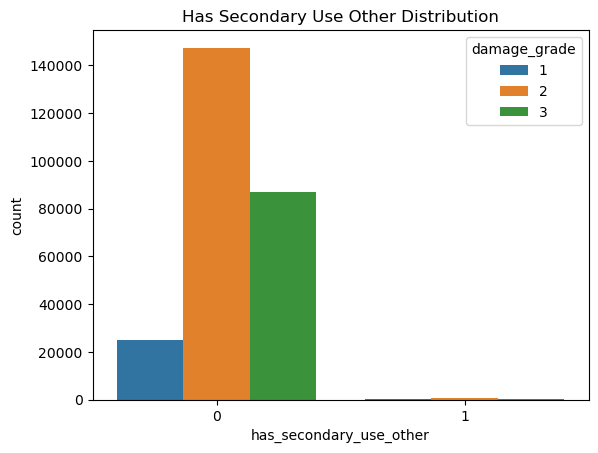

Unique Values are: [0 1]


In [207]:
countplot_vis(df.has_secondary_use_other, "Has Secondary Use Other")

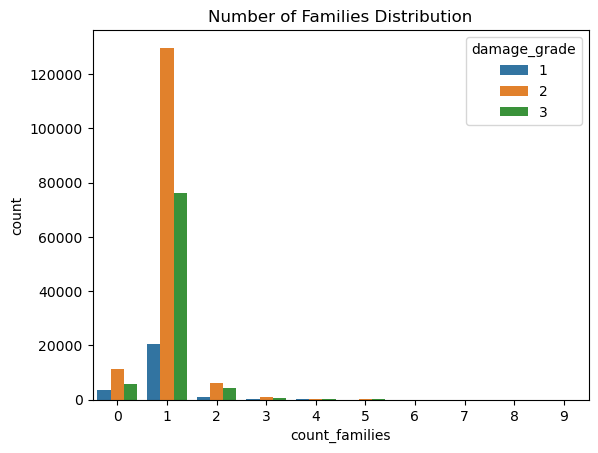

Unique Values are: [1 0 2 3 4 5 6 7 9 8]


In [208]:
countplot_vis(df.count_families, "Number of Families")